In [1]:
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_probability as tfp
import functools
import contextlib
import time
import shutil

In [2]:
x = tf.linspace(-2*math.pi, 6*math.pi, 30)
x = tf.Variable(x)
rate_alpha = 0.05
dropping_threshold = 3000
np.random.seed(seed=2022)

Maximize the functions

In [3]:
def o_eq(xs):
  return -xs**2

def exp_eq(xs):
  return -(xs-10.0)**2

def loss_1():
  return -o_eq(xs_l1)

def loss_2():
  return -exp_eq(xs_l2)

def loss_3():
  return -(o_eq(xs_l3) + tf.stop_gradient(exp_eq(xs_l3) - o_eq(xs_l3)))

def loss_4():
  return tf.experimental.numpy.log10((o_eq(xs_l4) + tf.stop_gradient(exp_eq(xs_l4) - o_eq(xs_l4))))

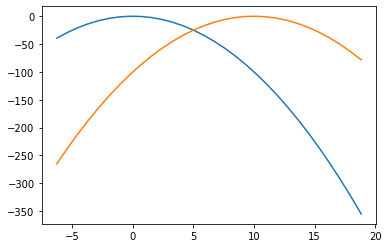

In [4]:
plt.plot(x.numpy(), o_eq(x))
plt.plot(x.numpy(), exp_eq(x))
plt.show()

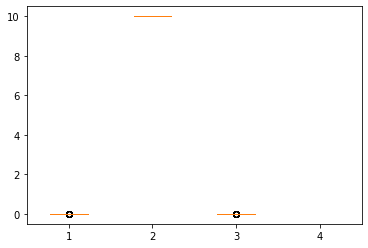

In [5]:
optimal_solution_l1 = []
optimal_solution_l2 = []
optimal_solution_l3 = []
optimal_solution_l4 = []
init_seed = []
for ii in range(100):
  seeding_init = (np.random.rand()-0.5)*25.0+10.0
  init_seed.append(seeding_init)
  opt_loss1 = tf.keras.optimizers.Adam(learning_rate=rate_alpha)
  opt_loss2 = tf.keras.optimizers.Adam(learning_rate=rate_alpha)
  opt_loss3 = tf.keras.optimizers.Adam(learning_rate=rate_alpha)
  opt_loss4 = tf.keras.optimizers.Adam(learning_rate=rate_alpha)
  xs_l1 = tf.Variable(seeding_init)
  xs_l2 = tf.Variable(seeding_init)
  xs_l3 = tf.Variable(seeding_init)
  xs_l4 = tf.Variable(seeding_init)

  for ii in range(dropping_threshold):
    opt_loss1.minimize(loss_1, [xs_l1])
    opt_loss2.minimize(loss_2, [xs_l2])
    opt_loss3.minimize(loss_3, [xs_l3])
    opt_loss4.minimize(loss_4, [xs_l4])
  
  optimal_solution_l1.append(xs_l1.numpy())
  optimal_solution_l2.append(xs_l2.numpy())
  optimal_solution_l3.append(xs_l3.numpy())
  optimal_solution_l4.append(xs_l4.numpy())

np.savetxt("loss_1_optima.csv", optimal_solution_l1, delimiter=",")
np.savetxt("loss_2_optima.csv", optimal_solution_l2, delimiter=",")
np.savetxt("loss_3_optima.csv", optimal_solution_l3, delimiter=",")
np.savetxt("loss_4_optima.csv", optimal_solution_l4, delimiter=",")
np.savetxt("optima_init.csv", init_seed, delimiter=",")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([optimal_solution_l1, optimal_solution_l2, optimal_solution_l3, optimal_solution_l4])
plt.show()

In [6]:
x = tf.linspace(-2*math.pi, 6*math.pi, 50)
x = tf.Variable(x)
with tf.GradientTape(persistent=True) as tape:
  loss_1_v = -o_eq(x)
  loss_2_v = -exp_eq(x)
  loss_3_v = -(o_eq(x) + tf.stop_gradient(exp_eq(x) - o_eq(x)))
  loss_4_v = tf.experimental.numpy.log10((o_eq(x) + tf.stop_gradient(exp_eq(x) - o_eq(x))))
grad_l1 = tape.gradient(loss_1_v, x)
grad_l2 = tape.gradient(loss_2_v, x)
grad_l3 = tape.gradient(loss_3_v, x)
grad_l4 = tape.gradient(loss_4_v, x)

np.savetxt("loss_1_visual.csv", loss_1_v.numpy(), delimiter=",")
np.savetxt("loss_2_visual.csv", loss_2_v.numpy(), delimiter=",")
np.savetxt("loss_3_visual.csv", loss_3_v.numpy(), delimiter=",")
np.savetxt("loss_4_visual.csv", loss_4_v.numpy(), delimiter=",")
np.savetxt("loss_1_grad.csv", grad_l1.numpy(), delimiter=",")
np.savetxt("loss_2_grad.csv", grad_l2.numpy(), delimiter=",")
np.savetxt("loss_3_grad.csv", grad_l3.numpy(), delimiter=",")
np.savetxt("loss_4_grad.csv", grad_l4.numpy(), delimiter=",")
shutil.make_archive('export', format='zip')


'export.zip'